# Testing the required functions for Image Processing

In [1]:
import cv2
import matplotlib.pyplot as plt
import imutils

## Function for croppping the image

In [2]:
def crop_contour_brain_img(image , plot=False):
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grayscale = cv2.GaussianBlur(grayscale, (5, 5), 0)
    threshold_image = cv2.threshold(grayscale, 45, 255,cv2.THRESH_BINARY)[1]
    threshold_image = cv2.erode(threshold_image,None,iterations=2)
    threshold_image = cv2.dilate(threshold_image, None, iterations=2)

    contour = cv2.findContours(threshold_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = imutils.grab_contours(contour)
    c = max(contour, key=cv2.contourArea)

    extreme_pnts_left = tuple(c[c[:, :, 0].argmin()][0])
    extreme_pnts_right = tuple(c[c[:, :, 0].argmax()][0])
    extreme_pnts_top = tuple(c[c[:, :, 1].argmin()][0])
    extreme_pnts_bottom = tuple(c[c[:, :, 1].argmax()][0])

    new_image = image[extreme_pnts_top[1]:extreme_pnts_bottom[1], extreme_pnts_left[0]:extreme_pnts_right[0]]

    if plot:
        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(image)

        plt.tick_params(axis='both',which='both',
                        top = False, bottom = False, left = False, right = False, labelbottom= False,labeltop= False,
                        labelleft= False, labelright= False)
        plt.title('Original Image')
        plt.show()
        plt.subplot(1,2,1)
        plt.imshow(new_image)

        plt.tick_params(axis='both',which='both',
                        top = False, bottom = False, left = False, right = False, labelbottom= False,labeltop= False,
                        labelleft= False, labelright= False)
        plt.title('Cropped Image')
        plt.show()

        return new_image

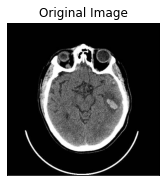

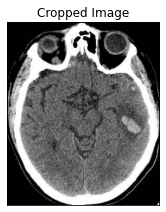

In [3]:
example_image = cv2.imread('Sample_Images/20_0_80.jpg')
example_new_image = crop_contour_brain_img(example_image, True) # Calling the Cropping function

In [4]:
# Checking the dimensions of the original image
example_image.shape

(512, 512, 3)

In [5]:
# Checking the dimensions of the Cropped image
example_new_image.shape

(361, 301, 3)

## Function for Scaling the cropped image

In [7]:
def scaling_img(image,plot=False):
#     img =cv2.imread('path of image',cv2.IMREAD_UNCHANGED)
    print('original dimensions:',image.shape)
    height =512
    width =512
#     if width>height:
#         width = img.shape[0] #passing the dimension of height
#     else: 
#         height = img.shape[1]
    dsize = (width,height)
    resized = cv2.resize(image,dsize,interpolation=cv2.INTER_AREA)
    print('Resized Dimensions:',resized.shape)
    
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)

        plt.tick_params(axis='both',which='both',
                        top = False, bottom = False, left = False, right = False, labelbottom= False,labeltop= False,
                        labelleft= False, labelright= False)
        plt.title('Cropped unscaled Image')
        plt.show()
        plt.subplot(1, 2, 1)
        plt.imshow(resized)

        plt.tick_params(axis='both',which='both',
                        top = False, bottom = False, left = False, right = False, labelbottom= False,labeltop= False,
                        labelleft= False, labelright= False)
        plt.title('Scalled Image')
        plt.show()
    
    return resized

original dimensions: (361, 301, 3)
Resized Dimensions: (512, 512, 3)


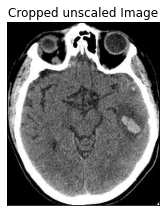

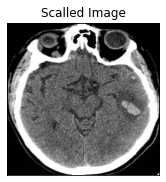

In [8]:
scaled_img =scaling_img(example_new_image,True) # Calling the Scalling function

## Function For Noise Removal

In [9]:
def noise_remv(image,plot=False):
#   img = cv2.imread("filename or path of th img",1)
#   kernel = np.ones((3,3),np.float32)/9)
#   filt_2D = cv2.filter2D(img,-1,kernel)
    filtered_img = cv2.GaussianBlur(image,(7,7),0)
    
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)

        plt.tick_params(axis='both',which='both',
                        top = False, bottom = False, left = False, right = False, labelbottom= False,labeltop= False,
                        labelleft= False, labelright= False)
        plt.title('Noisy Image')
        plt.show()
        plt.subplot(1, 2, 1)
        plt.imshow(filtered_img)

        plt.tick_params(axis='both',which='both',
                        top = False, bottom = False, left = False, right = False, labelbottom= False,labeltop= False,
                        labelleft= False, labelright= False)
        plt.title('Filtered Image')
        plt.show()
    
    
    return filtered_img

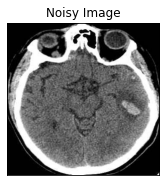

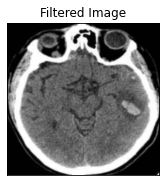

In [10]:
remvd_noise = noise_remv(scaled_img,True) #Calling the noise removal function